In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
sys.path.append('/Users/user/PythonProjects/SpyDust/')

import SpyDust.main.Grain as spyGrain
from SpyDust.utils.util import cgsconst

import SpyDust.main.SpyDust as SpyDust
import SpyDust.SPDUST_as_is.spdust as spdust
import SpyDust.SPDUST_as_is.grain_properties as spdust_grain

Environment parameters

In [4]:
DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [23]:
min_freq=1 # in GHz
max_freq=300 # in GHz
n_freq=500

env_list = [DC_params, MC_params, CNM_params, WNM_params, WIM_params, RN_params, PDR_params]
ISM_list = [ 'DC', 'MC', 'CNM', 'WNM', 'WIM', 'RN', 'PDR']

#
a1 = 5e-8
beta_list1 = [-0.45, -0.35, -0.25, -0.15]

a2 = 1e-7
beta_list2 = [-0.2, 0.1, 0, 0.5]

SED_a1, SED_a2 = [], []

env_ind = 2

for beta_ind in range(4):
    Spy_SED_a1 = SpyDust.SpyDust_single_grain(env_list[env_ind], a1, beta_list1[beta_ind], min_freq=min_freq, max_freq=max_freq, n_freq=n_freq)
    SED_a1.append(Spy_SED_a1)
    Spy_SED_a2 = SpyDust.SpyDust_single_grain(env_list[env_ind], a2, beta_list2[beta_ind], min_freq=min_freq, max_freq=max_freq, n_freq=n_freq)
    SED_a2.append(Spy_SED_a2)

In [6]:
colors=['#9ED17B', '#367DB0', '#A8ACCB', '#AC8AB3']

In [9]:
Spy_SED_a1[0].shape

(500,)

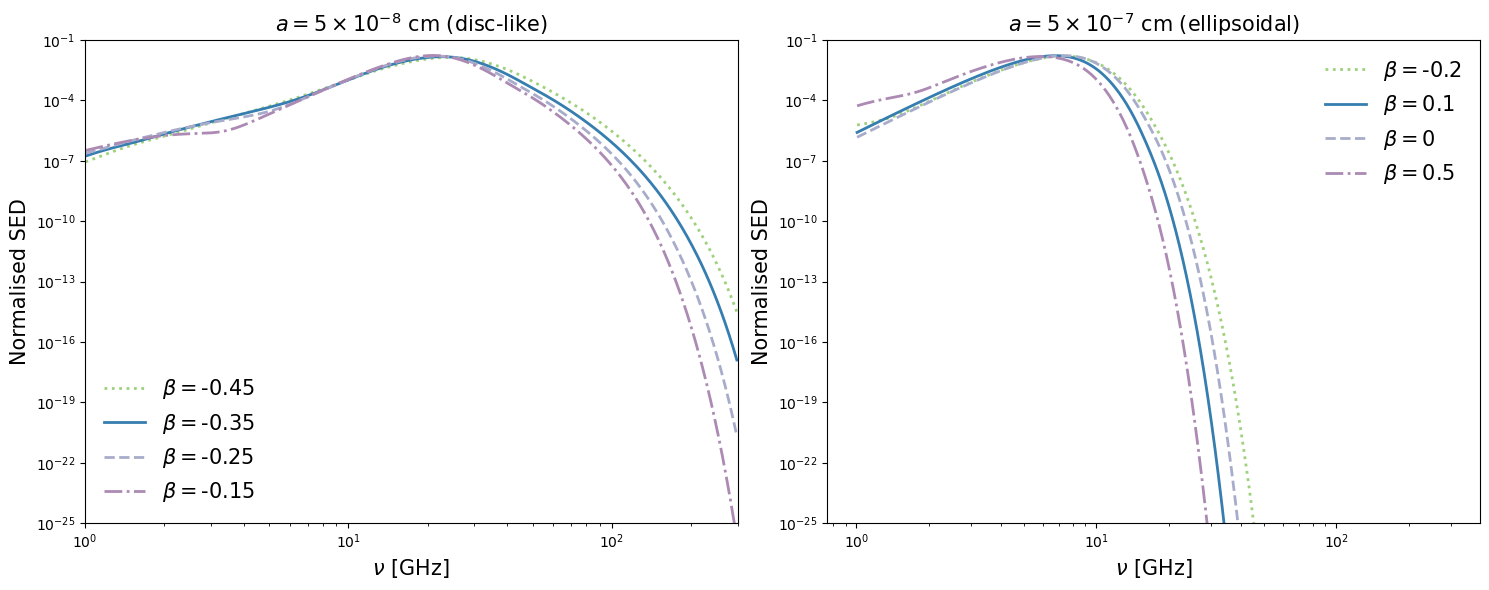

In [31]:
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2)

# First row: single wide plot for title/labels
#main_ax = fig.add_subplot(gs[0, 2])
# main_ax.set_title("Main Title for All Subplots")
#main_ax.axis('off')  # Hide the axis as it's just for title/label space

# Create a dummy plot for the legend
#lines = []
labels = [r"$a=5\times 10^{-8}$ cm", r"$a=5\times 10^{-7}$ cm"]
linestyles = [':', '-', '--', '-.'] 

fsize = 15

#for i in range(3):
#    line, = main_ax.plot([], [], ls=linestyles[i], label=labels[i], color=colors[i])  # Dummy lines for legend
#    lines.append(line)

# Place the global legend in the main axis
#main_ax.legend(handles=lines, loc="center", frameon=False, fontsize=15, ncol=1)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

for beta_ind in range(4):
    Spy_SED_cyl = SED_a1[beta_ind]
    ax1.loglog(Spy_SED_cyl[0,:], Spy_SED_cyl[1,:]/np.sum(Spy_SED_cyl[1,:]), ls=linestyles[beta_ind], color=colors[beta_ind], label=r'$\beta=$'+str(beta_list1[beta_ind]), lw=2)
    Spy_SED_eps = SED_a2[beta_ind]
    ax2.loglog(Spy_SED_eps[0,:], Spy_SED_eps[1,:]/np.sum(Spy_SED_eps[1,:]), ls=linestyles[beta_ind], color=colors[beta_ind], label=r'$\beta=$'+str(beta_list2[beta_ind]), lw=2)
    
ax1.set_xlabel(r'$\nu$ [GHz]', fontsize=fsize)
ax1.set_ylabel('Normalised SED', fontsize=fsize)
ax1.set_ylim(1e-25,1e-1)
ax1.set_xlim(1, 300)
ax1.set_title(r"$a=5\times 10^{-8}$ cm (disc-like)", fontsize=fsize)
ax2.set_xlabel(r'$\nu$ [GHz]', fontsize=fsize)
ax2.set_ylabel('Normalised SED', fontsize=fsize)
ax2.set_title(r"$a=5\times 10^{-7}$ cm (ellipsoidal)", fontsize=fsize)
ax1.set_xlim(1, 300)
ax2.set_ylim(1e-25,1e-1)

ax1.legend(fontsize=15, frameon=False)
ax2.legend(fontsize=15, frameon=False)





plt.tight_layout()
plt.savefig('figures/beta_comparison.pdf', bbox_inches='tight')
#plt.xlabel(r'$\nu$ [GHz]')
#plt.title('Normalised SED')
#plt.xlim(1, 200)
#plt.legend()

### If we further consider an ensemble of $\beta$, rather than a single $\beta$ for each `a'

In [ ]:
Spy_SED_single_beta_list, Spy_SED_ensemble_beta_list = [], []
for i in range(len(env_list)):
    env = env_list[i]
    if i in [0, 1]:
        sp_plasma = True
    else:
        sp_plasma = False
    Spy_SED_single_beta = Spy_SED_new_plasma_list[i]
    Spy_SED_ensemble_beta = SpyDust(env, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq, single_beta=False, spdust_plasma=sp_plasma)
    #SPD_SED = SPDUST(env, min_freq = min_freq, max_freq=max_freq, n_freq=n_freq)
    Spy_SED_single_beta_list.append(Spy_SED_single_beta)
    Spy_SED_ensemble_beta_list.append(Spy_SED_ensemble_beta)
    #SPD_SED_list.append(SPD_SED)

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16),sharey=True)
def plot_beta_SED(env_ind, ax, title, plot_xlabel=False, plot_ylabel=False, DC=False):
    if DC: # Avoid plotting the high frequency part of the SED for DC environment (those values are numerical 0)
        ax.loglog(SPD_SED_list[env_ind][0,:450], 
                  SPD_SED_list[env_ind][1,:450]/np.sum(SPD_SED_list[env_ind][1,:450]), 
                  ls=linestyles[0], color=colors[0])
        ax.loglog(Spy_SED_single_beta_list[env_ind][0,:450], 
                  Spy_SED_single_beta_list[env_ind][1,:450]/np.sum(Spy_SED_single_beta_list[env_ind][1,:450]), 
                  ls=linestyles[1], color=colors[1])
        ax.loglog(Spy_SED_ensemble_beta_list[env_ind][0,:450], 
                  Spy_SED_ensemble_beta_list[env_ind][1,:450]/np.sum(Spy_SED_ensemble_beta_list[env_ind][1,:450]),
                  ls=linestyles[2], color=colors[2])
    else:
        ax.loglog(SPD_SED_list[env_ind][0,:], SPD_SED_list[env_ind][1,:]/np.sum(SPD_SED_list[env_ind][1,:]), ls=linestyles[0], color=colors[0])
        ax.loglog(Spy_SED_single_beta_list[env_ind][0,:], Spy_SED_single_beta_list[env_ind][1,:]/np.sum(Spy_SED_single_beta_list[env_ind][1,:]), ls=linestyles[1], color=colors[1])
        ax.loglog(Spy_SED_ensemble_beta_list[env_ind][0,:], Spy_SED_ensemble_beta_list[env_ind][1,:]/np.sum(Spy_SED_ensemble_beta_list[env_ind][1,:]), ls=linestyles[2], color=colors[2])
    ax.set_xlim(1, 300)
    if plot_xlabel:
        ax.set_xlabel(r'$\nu$ [GHz]', fontsize=13)
        # set xticks fontsize to be 12
        ax.tick_params(axis='x', labelsize=12)
    else:
        ax.set_xticks([])
    if plot_ylabel:
        ax.set_ylabel('Normalised SED', fontsize=13)
    ax.set_ylim(5e-9, 5e-2)
    ax.set_title(title, fontsize=13)

plot_beta_SED(0, axs[0, 0], 'DC', plot_ylabel=True, DC=True)
plot_beta_SED(1, axs[0, 1], 'MC')
plot_beta_SED(2, axs[1, 0], 'CNM', plot_ylabel=True)
plot_beta_SED(3, axs[1, 1], 'WNM')
plot_beta_SED(4, axs[2, 0], 'WIM', plot_ylabel=True)
plot_beta_SED(5, axs[2, 1], 'RN', plot_xlabel=True)
plot_beta_SED(6, axs[3, 0], 'PDR', plot_xlabel=True, plot_ylabel=True)
axs[3, 1].axis('off')
# Create a dummy plot in axs[3,1] for the legend
lines = []
beta_labels = ['spdust2', 'SpyDust; single $\\beta$', 'SpyDust; $\\beta$ ensemble']
for i in range(3):
    line, = axs[3, 1].plot([], [], ls=linestyles[i], color=colors[i], label=beta_labels[i])
    lines.append(line)
axs[3, 1].legend(handles=lines, loc='center', fontsize=14, frameon=False)  
plt.tight_layout()
plt.savefig('figures/beta_SED_comparison.pdf', bbox_inches='tight')

